### **Used Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Data**

**About Dataset**

The dataset provided contains information about students enrolled in an academic program. It composes of 200000 samples and 10 fields:

- Student ID: A unique identifier for each student in the dataset.
- Student Name: The name of the student.
- Date of Birth: The birth date of the student.
- Field of Study: The academic discipline or field that the student is pursuing.
- Year of Admission: The year in which the student was admitted to the program.
- Expected Year of Graduation: The anticipated year of graduation for the student.
- Current Semester: The current semester or term in which the student is enrolled.
- Specialization: The specific area of focus or specialization within the field of study.
- Fees: The total fees or tuition amount for the student.
- Discount on Fees: The amount of discount applied to the student's fees.

In [3]:
# Loading data into dataframe
data = pd.read_csv('student_data.csv')

In [4]:
# Displaying first 5 rows
data.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


### **Explore Data**

Some fields (Student ID and Student Name) in the dataset are useless so far for the preprocessing and analysis phase, so it's handful to drop them off.

In [5]:
# Removing the Student ID and Student Name columns
data = data.drop(['Student ID', 'Student Name'],
            axis = 1)

# Verification step
data.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


### **Data Exploration**

In [6]:
# Checking dataset dimension (shape)
data.shape

(200000, 8)

According to the description from the previous section, it's confirmed that the dataset has ***200000*** observations and **10** features (fields). Remember, **2** features have already been removed, so in total there are **10** features.


In [7]:
# Returning all the datatypes used in the dataset
data.dtypes

Date of Birth                  object
Field of Study                 object
Year of Admission               int64
Expected Year of Graduation     int64
Current Semester                int64
Specialization                 object
Fees                            int64
Discount on Fees                int64
dtype: object

The dataset, as it's mentioning, revolves around 2 types: **object** (qualitative or categorical values) and **int24** (quantitative or numerical values)

In [12]:
# Getting more statistical details
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year of Admission,200000.0,2018.997685,2.002381,2016.0,2017.0,2019.0,2021.00,2022.0
Expected Year of Graduation,200000.0,2019.995235,1.997744,2017.0,2018.0,2020.0,2022.00,2023.0
Current Semester,200000.0,2.499020,1.117804,1.0,1.0,2.0,3.00,4.0
Fees,200000.0,125092.847595,43287.894903,50000.0,87641.5,125221.0,162597.25,200000.0
Discount on Fees,200000.0,12484.258575,8788.362629,0.0,5383.0,10792.5,18154.00,39865.0


The describe() method works only on numerical data. That's why, the dataframe shows only 5 columns

In [11]:
# Checking missing values
data.isna().sum()

Date of Birth                  0
Field of Study                 0
Year of Admission              0
Expected Year of Graduation    0
Current Semester               0
Specialization                 0
Fees                           0
Discount on Fees               0
dtype: int64

Great!! No missing values found in any column. Let's check now the unique values for each categorical column

<Axes: >

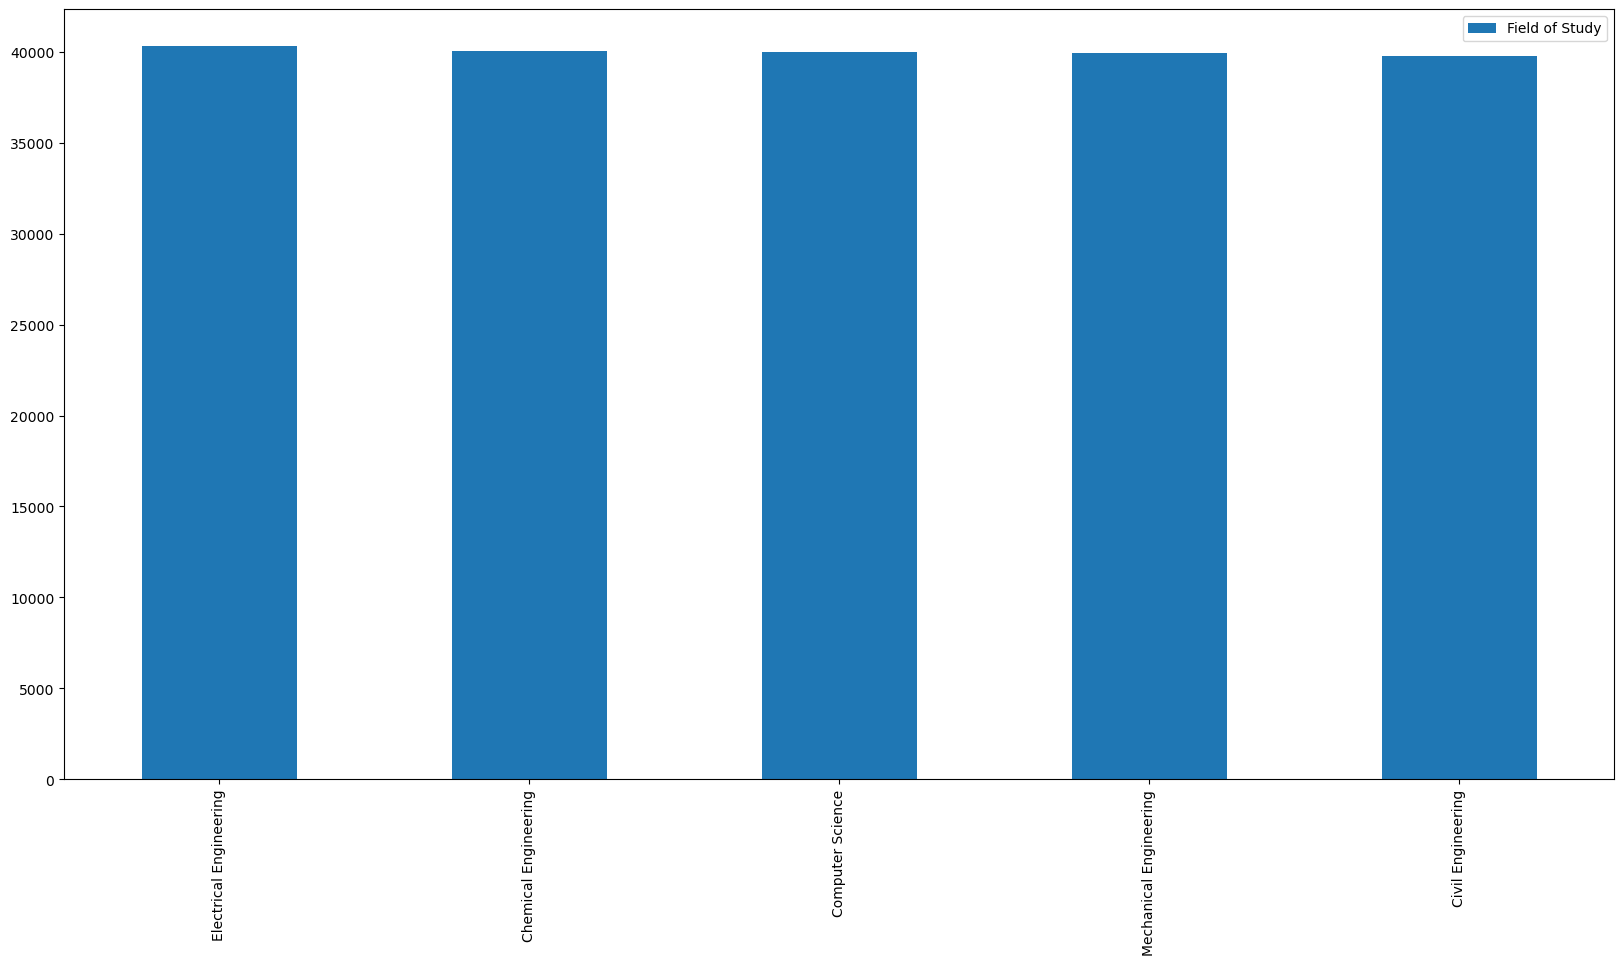

In [18]:
pd.DataFrame(data['Field of Study'].value_counts()).plot(kind='bar', figsize=(20,10))

In [28]:
field_of_study = data['Field of Study'].unique()
field_of_study

array(['Computer Science', 'Mechanical Engineering', 'Civil Engineering',
       'Chemical Engineering', 'Electrical Engineering'], dtype=object)

For the "Fied of Study" column, there are 5 unique values each one contains 4000 samples:
- Computer Science
- Mechanical Engineering
- Civil Engineering
- Chemical Engineering
- Electrical Engineering

<Axes: >

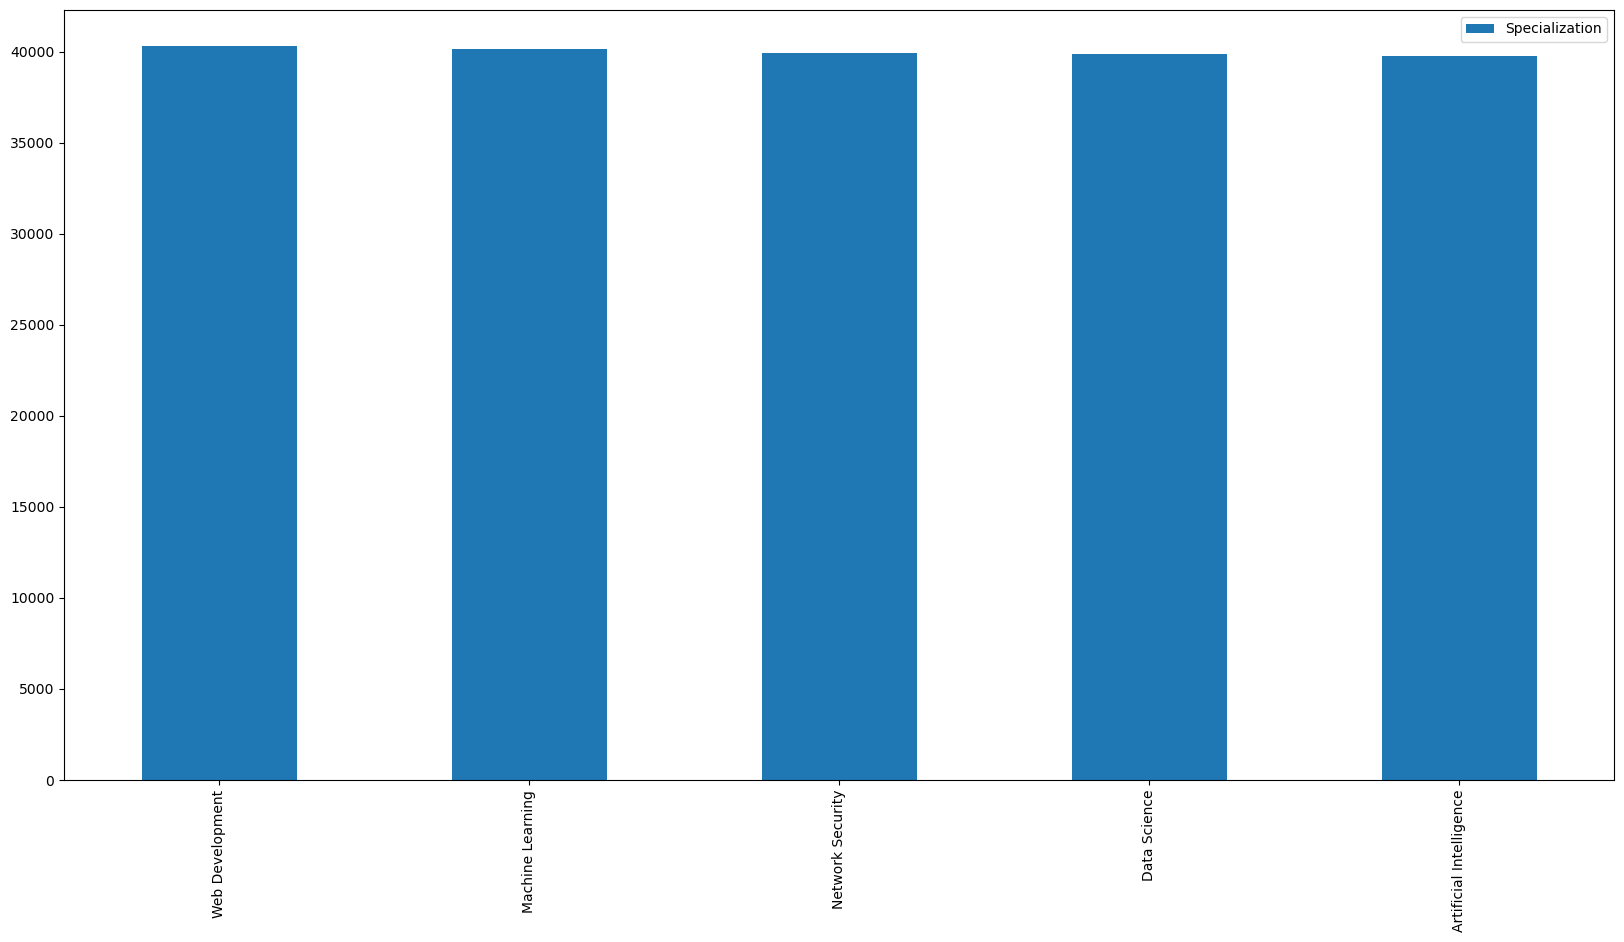

In [20]:
pd.DataFrame(data['Specialization'].value_counts()).plot(kind='bar', figsize=(20,10))

In [27]:
specialization = data['Specialization'].unique()
specialization

array(['Web Development', 'Machine Learning', 'Network Security',
       'Data Science', 'Artificial Intelligence'], dtype=object)

The "Specialization" column also consists of 5 unique values where the samples have been distributed equally:
- Web Development
- Machine Learning
- Network Security
- Data Science
- Artificial Intelligence

Before proceeding, let's dive deeper into some more analysis

>>> Number of Specializations for each Field:
 Field of Study
Electrical Engineering    40305
Chemical Engineering      40020
Computer Science          39960
Mechanical Engineering    39941
Civil Engineering         39774
Name: Specialization, dtype: int64


<Axes: title={'center': 'Number of Specializations for each Field'}, xlabel='Field of Study', ylabel='Specialization'>

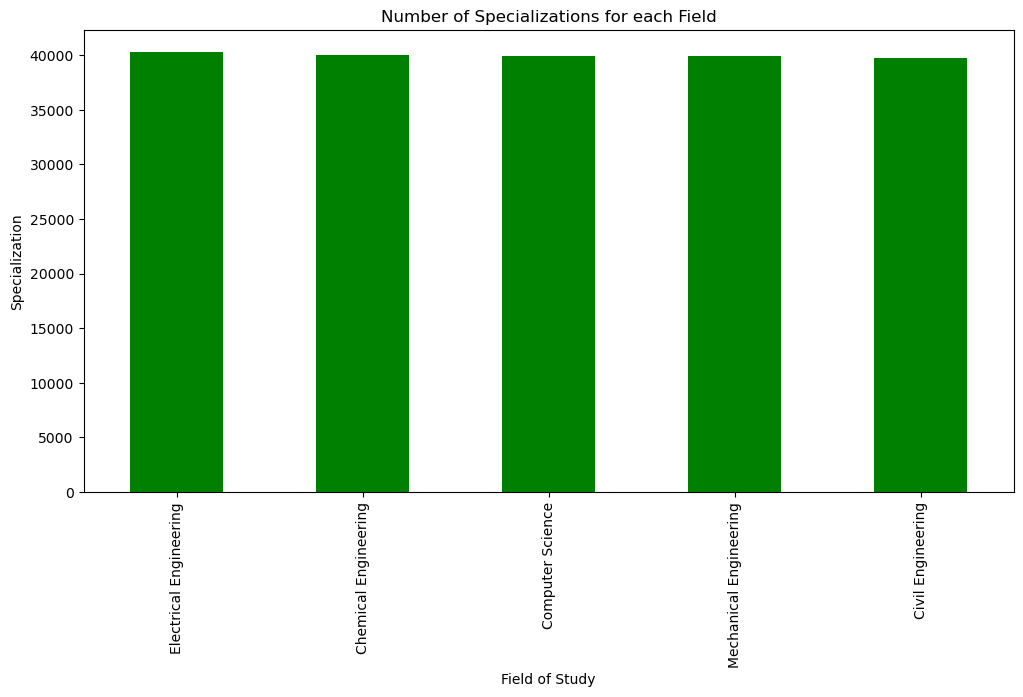

In [30]:
# How many specializations each field contains?

# Grouping the dataframe by each unique field according to the number of specializations each field has 
q = data.groupby(['Field of Study']).count()['Specialization'].sort_values(ascending=False).head()
print('>>> Number of Specializations for each Field:\n',q)
q.plot.bar(xlabel='Field of Study', ylabel='Specialization', color='green', figsize=(12,6),
                                    title='Number of Specializations for each Field')

<Figure size 1000x600 with 0 Axes>

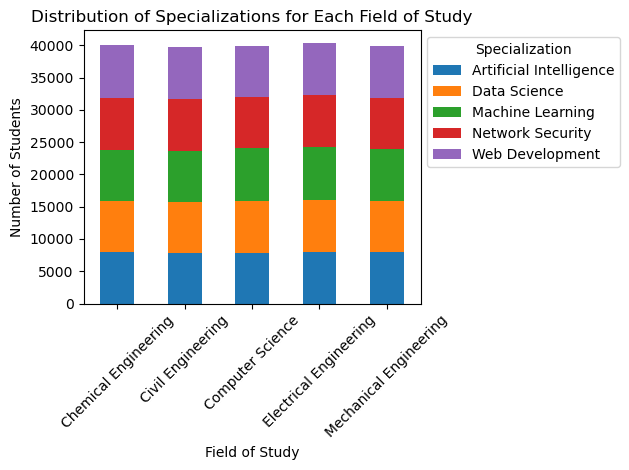

In [31]:
# Group the data by Field of Study and Specialization, and count the number of occurrences
grouped_data = data.groupby(["Field of Study", "Specialization"]).size().unstack()

# Create a stacked bar plot to visualize the specializations for each field of study
plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True)
plt.xlabel("Field of Study")
plt.ylabel("Number of Students")
plt.title("Distribution of Specializations for Each Field of Study")
plt.xticks(rotation=45)
plt.legend(title="Specialization", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

The distribution of specializations for each field of study in the dataset appears to be relatively equal. By observing the plot, we can see that the bars within each field of study are generally of similar height, indicating a relatively balanced distribution of specializations. And this balance may help also in the splitting and prediction phase.